**I HAVE DIVIDED THIS NOTEBOOK INTO TWO, GIVEN ITS LENGTH. THIS ONE GOES FROM THE IMPORT OF THE CLEANED DATASETS TO THE FEATURE SELECTION.
I HAVE ALSO SHRINKED THE TECHNIQUES USED IN FUTURE SELECTION AS USING ALL OF THEM WAS REDUNDANT AND INCORRECT.**

**AT THE FOLLOWING LINK YOU WILL FIND THE MODELLING PART:**

https://colab.research.google.com/drive/1nByNdlww4OB3qKfMWShTH4XT9r7y-7DF#scrollTo=5RAyLP2evhRl

# Imports & uploads

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#Andrea's imports
#import contracts, contract_dates as dataframes

contracts = pd.read_csv("C:/Users/lizbe/OneDrive/Documents/BBS/Machine Learning/Churn Data/clean/cleaned_contracts.csv")
contract_dates = pd.read_csv("C:/Users/lizbe/OneDrive/Documents/BBS/Machine Learning/Churn Data/clean/cleaned_contract_dates.csv")

#import cleaned client data
clients = pd.read_csv('C:/Users/lizbe/OneDrive/Documents/BBS/Machine Learning/Churn Data/clean/cleaned_client.csv')

#import cleaned info auto
infoauto = pd.read_csv('C:/Users/lizbe/OneDrive/Documents/BBS/Machine Learning/Churn Data/clean/CHURN_INFOAUTO_imputado.csv')



# Initial exploration: head, mean

In [54]:
contract_dates.head()

,CONTRACT_CODE,DAT_DECORRENZA,DAT_CHIUSURA,DAT_SCADENZA,DECORRENZA_ANNO,CHIUSURA_ANNO,SCADENZA_ANNO,CONTRACT_N
0,001000034&000403,2014-12-02,2015-12-02,2015-12-02,2014,2015,2015,001000034&000403
1,001000034&000404,2015-12-02,2016-03-09,2016-12-02,2015,2016,2016,001000034&000404
2,001000042&000215,2014-03-23,2014-09-13,2015-03-23,2014,2014,2015,001000042&000215
3,001000042&000215V16,2015-01-14,2015-01-30,2015-07-24,2015,2015,2015,001000042&000215
4,001000042&000215V17,2015-04-28,2015-05-20,2015-10-20,2015,2015,2015,001000042&000215


In [55]:
contracts.head()

,ID_CLIENTE,CANALE_PROV,STATO,SIT ASSUN,NUM_RATE,MODALITA_PAGAMENTO_STIPULA,RAGG_BUSINESS,AMT_PREMIO_RCA,SCONTO_TOT_RCA,AMT_PREMIO_CTTO,AMT_SCONTO_CTTO,GAR_BONUS_PROTECTION,GAR_INCFURTO,GAR_INFORTUNI_MALATTIA,GAR_KASKO_MINIKASKO,GAR_VANDALICI,GAR_VEICOLI_NON_ASSICURATI,CONTRACT_CODE
0,726774,Online,In vigore,Nuovo Contratto,0,Altro,DIRECT,396.00,266,396,0,0,0,0,0,0,0.0,0040137916&000100
1,726792,Agenzia,Sostituito,Nuovo Contratto,0,Banca/Posta,GROUPED,298.66,180,480,20,0,1,1,0,0,0.0,0010379604&000600
2,726792,Telefono,Sostituito,Rinnovo,0,Carta di credito,GROUPED,290.62,209,465,335,0,1,1,0,0,0.0,0010379604&000601
3,726792,Telefono,Sostituito,Rinnovo,0,Carta di credito,GROUPED,313.12,400,486,359,0,1,1,0,0,0.0,0010379604&000602
4,726792,Telefono,Sostituito,Rinnovo,0,Carta di credito,GROUPED,327.01,271,470,45,0,1,1,0,0,0.0,0010379604&000603


In [102]:
#calculate average of amt_premio_ctto
contracts['AMT_PREMIO_CTTO'].mean()


406.4343326286353

In [ ]:
contracts['CANAL'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376003 entries, 0 to 1376002
Data columns (total 18 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   ID_CLIENTE                  1376003 non-null  int64  
 1   CANALE_PROV                 1376003 non-null  object 
 2   STATO                       1376003 non-null  object 
 3   SIT ASSUN                   1376003 non-null  object 
 4   NUM_RATE                    1376003 non-null  int64  
 5   MODALITA_PAGAMENTO_STIPULA  1376003 non-null  object 
 6   RAGG_BUSINESS               1376003 non-null  object 
 7   AMT_PREMIO_RCA              1376003 non-null  float64
 8   SCONTO_TOT_RCA              1376003 non-null  int64  
 9   AMT_PREMIO_CTTO             1376003 non-null  int64  
 10  AMT_SCONTO_CTTO             1376003 non-null  int64  
 11  GAR_BONUS_PROTECTION        1376003 non-null  int64  
 12  GAR_INCFURTO                1376003 non-null  int64  
 1

In [125]:
infoauto.head()

,DATA_PRIMA_IMMATRICOLAZIONE,IMPORTO_VALORE_COMMERCIALE,COD_TIPOLOGIA_GUIDATORI,KM_ANNUI_PREVISTI,COD_TIPO_ALIMENTAZIONE,DESC_MARCA,DESC_TIPO_VEICOLO,CONTRACT_CODE
0,2011-01-01,15300.000000,C,10000.0,G,Renault,Car,001000034&000403
1,2011-01-01,10000.000000,C,10000.0,G,Renault,Car,001000034&000404
2,2005-01-01,2255.453943,C,5000.0,M,Renault,Scooter,001000042&000215
3,2005-01-01,2255.453943,C,5000.0,M,Renault,Scooter,001000042&000215V16
4,2005-01-01,2255.453943,C,5000.0,M,Renault,Scooter,001000042&000215V17


In [57]:
clients.head()

,ANZIANITA_ATTIVA,NUMERO_SINISTRI,PROV_RES,RATING,FIGLI,SUM_IMP_PREMIO_CTTO,ID_CLIENTE,ANNO_NASC_PF,GENDER,RATING_C,AGE_2020
0,11.0,0.0,SV,4.0,0,329.0,802736,1963,F,Medium(4-6),57
1,0.0,0.0,RM,5.0,0,3119.0,152174,1973,F,Medium(4-6),47
2,0.0,0.0,MI,5.0,0,3333.0,80130,1933,M,Medium(4-6),87
3,0.0,0.0,PA,5.0,0,1308.0,1428935,1962,M,Medium(4-6),58
4,6.0,0.0,PA,5.0,1,434.0,635419,1944,M,Medium(4-6),76


# Merging the datasets

In [13]:
full_table=contract_dates.merge(contracts, on='CONTRACT_CODE', how='left')



In [14]:
full_table=full_table.merge(infoauto, on='CONTRACT_CODE', how='right')


In [15]:
full_table=full_table.merge(clients, on='ID_CLIENTE', how='left')

In [16]:
full_table['DAT_SCADENZA']= pd.to_datetime(full_table['DAT_SCADENZA'])
full_table['DAT_DECORRENZA']= pd.to_datetime(full_table['DAT_DECORRENZA'])
full_table['DAT_CHIUSURA']= pd.to_datetime(full_table['DAT_CHIUSURA'])
full_table['T_DURATION'] = full_table['DAT_SCADENZA'] - full_table['DAT_DECORRENZA']
full_table['REAL_DURATION'] = full_table['DAT_CHIUSURA'] - full_table['DAT_DECORRENZA']


In [17]:
print(full_table['T_DURATION'].mean())
print(full_table['REAL_DURATION'].mean())

print(full_table['T_DURATION'].median())
print(full_table['REAL_DURATION'].median())



324 days 09:35:25.542576812
271 days 20:52:15.364565144
365 days 00:00:00
365 days 00:00:00


In [18]:
churned= ['Chiuso (scaduto)', 'Cancellazione rischio cessato', 'Storno amministrativo', 'Rescissione per contenzioso', 'Rescissione per pentimento', 'Rescissione consensuale' ]
full_table['contract_churn'] = np.where(full_table['STATO'].isin(churned), 1, 0)
full_table=full_table.sort_values(by='DAT_DECORRENZA', ascending=True)

In [19]:
churned_for_year= full_table['DECORRENZA_ANNO']<full_table['CHIUSURA_ANNO']#DA ELIMINARE
full_table['contract_churn_year']=np.where(churned_for_year, 1, 0)

In [20]:
full_table['contract_churn'].value_counts(normalize=True)

contract_churn
0    0.811366
1    0.188634
Name: proportion, dtype: float64

In [62]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1368547 entries, 0 to 1368549
Data columns (total 33 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   CANALE_PROV                 1368547 non-null  object 
 1   SIT ASSUN                   1368547 non-null  object 
 2   NUM_RATE                    1368547 non-null  int64  
 3   MODALITA_PAGAMENTO_STIPULA  1368547 non-null  object 
 4   RAGG_BUSINESS               1368547 non-null  object 
 5   AMT_PREMIO_RCA              1368547 non-null  float64
 6   SCONTO_TOT_RCA              1368547 non-null  int64  
 7   AMT_PREMIO_CTTO             1368547 non-null  int64  
 8   AMT_SCONTO_CTTO             1368547 non-null  int64  
 9   GAR_BONUS_PROTECTION        1368547 non-null  int64  
 10  GAR_INCFURTO                1368547 non-null  int64  
 11  GAR_INFORTUNI_MALATTIA      1368547 non-null  int64  
 12  GAR_KASKO_MINIKASKO         1368547 non-null  int64  
 13  GA

In [21]:
# Get unique start years
start_years = full_table['DECORRENZA_ANNO'].unique()

# Create a dictionary to store yearly tables
yearly_tables = {}

# Iterate through unique start years and create tables
for year in start_years:
    yearly_tables[year] = full_table[full_table['DECORRENZA_ANNO'] == year]

# Access individual yearly tables

table_2014 = yearly_tables.get(2014)
table_2015 = yearly_tables.get(2015)
table_2016 = yearly_tables.get(2016)
table_2017 = yearly_tables.get(2017)
table_2018 = yearly_tables.get(2018)
table_2019 = yearly_tables.get(2019)
table_2020 = yearly_tables.get(2020)




In [13]:

print(table_2014.shape)
print(table_2014.shape)
print(table_2015.shape)
print(table_2016.shape)
print(table_2017.shape)
print(table_2018.shape)
print(table_2019.shape)
print(table_2020.shape)



(196819, 46)
(196819, 46)
(228245, 46)
(217224, 46)
(198003, 46)
(183769, 46)
(180908, 46)
(163582, 46)


In [22]:
def calculate_active_and_total_contracts(yearly_table, year):
    """
    Calculates the number of active and total registered contracts for each client in a yearly table.

    - Active contracts: contract_churn == 0
    - Total contracts: all contracts regardless of churn status

    Args:
        yearly_table (pd.DataFrame): The DataFrame containing contract data for a specific year.
        year (int): The year for which to calculate contracts.

    Returns:
        pd.DataFrame: The yearly_table with two new columns:
                      'n. of active contracts' and 'n. of total contracts'.
    """

    # --- Active contracts ---
    active_contracts = yearly_table[yearly_table['contract_churn'] == 0]
    active_contracts_count = active_contracts.groupby('ID_CLIENTE')['CONTRACT_CODE'].count()
    yearly_table['n. of active contracts'] = yearly_table['ID_CLIENTE'].map(active_contracts_count)
    yearly_table['n. of active contracts'].fillna(0, inplace=True)
    yearly_table['n. of active contracts'] = yearly_table.groupby('ID_CLIENTE')['n. of active contracts'].transform('first')

    # --- Total contracts ---
    total_contracts_count = yearly_table.groupby('ID_CLIENTE')['CONTRACT_CODE'].count()
    yearly_table['n. of total contracts'] = yearly_table['ID_CLIENTE'].map(total_contracts_count)
    yearly_table['n. of total contracts'] = yearly_table.groupby('ID_CLIENTE')['n. of total contracts'].transform('first')

    return yearly_table


In [23]:
table_2014 = calculate_active_and_total_contracts(table_2014, 2014)
table_2015 = calculate_active_and_total_contracts(table_2015, 2015)
table_2016 = calculate_active_and_total_contracts(table_2016, 2016)
table_2017 = calculate_active_and_total_contracts(table_2017, 2017)
table_2018 = calculate_active_and_total_contracts(table_2018, 2018)
table_2019 = calculate_active_and_total_contracts(table_2019, 2019)
table_2020 = calculate_active_and_total_contracts(table_2020, 2020)


C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\760680147.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_table['n. of active contracts'] = yearly_table['ID_CLIENTE'].map(active_contracts_count)
C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\760680147.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation in

In [24]:
active_statuses = ['Sostituito', 'In vigore', 'Sospensione', 'Sospensione per mancato pagamento']  # Add more if needed


Function for creating

In [25]:
def check_client_churn(group):
    """
    Checks if a client has churned based on the number of active contracts.
    Assigns label 1 if the number of active contracts is 0, otherwise 0.
    """
    num_active_contracts = group['n. of active contracts'].iloc[0]  # Get the number of active contracts (should be the same for all rows in the group)
    return 1 if num_active_contracts == 0 else 0  # Return 1 if churned (0 active contracts), 0 otherwise

# Compute client churn per client
client_churn_series = table_2014.groupby('ID_CLIENTE').apply(check_client_churn)
# Map the client churn value back to each row in table_2014 using the client ID as key
table_2014['client_churn'] = table_2014['ID_CLIENTE'].map(client_churn_series)
print(table_2014['client_churn'].isnull().sum())

client_churn_series = table_2015.groupby('ID_CLIENTE').apply(check_client_churn)
table_2015['client_churn'] = table_2015['ID_CLIENTE'].map(client_churn_series)
print(table_2015['client_churn'].isnull().sum())


client_churn_series = table_2016.groupby('ID_CLIENTE').apply(check_client_churn)
table_2016['client_churn'] = table_2016['ID_CLIENTE'].map(client_churn_series)
print(table_2016['client_churn'].isnull().sum())

client_churn_series = table_2017.groupby('ID_CLIENTE').apply(check_client_churn)
table_2017['client_churn'] = table_2017['ID_CLIENTE'].map(client_churn_series)
print(table_2017['client_churn'].isnull().sum())

client_churn_series = table_2018.groupby('ID_CLIENTE').apply(check_client_churn)
table_2018['client_churn'] = table_2018['ID_CLIENTE'].map(client_churn_series)
print(table_2018['client_churn'].isnull().sum())

client_churn_series = table_2019.groupby('ID_CLIENTE').apply(check_client_churn)
table_2019['client_churn'] = table_2019['ID_CLIENTE'].map(client_churn_series)
print(table_2019['client_churn'].isnull().sum())

client_churn_series = table_2020.groupby('ID_CLIENTE').apply(check_client_churn)
table_2020['client_churn'] = table_2020['ID_CLIENTE'].map(client_churn_series)
print(table_2020['client_churn'].isnull().sum())




C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  client_churn_series = table_2014.groupby('ID_CLIENTE').apply(check_client_churn)
C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2014['client_churn'] = table_2014['ID_CLIENTE'].map(client_churn_series)


0


C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  client_churn_series = table_2015.groupby('ID_CLIENTE').apply(check_client_churn)
C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2015['client_churn'] = table_2015['ID_CLIENTE'].map(client_churn_series)


0


C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  client_churn_series = table_2016.groupby('ID_CLIENTE').apply(check_client_churn)
C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2016['client_churn'] = table_2016['ID_CLIENTE'].map(client_churn_series)


0


C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  client_churn_series = table_2017.groupby('ID_CLIENTE').apply(check_client_churn)
C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2017['client_churn'] = table_2017['ID_CLIENTE'].map(client_churn_series)


0


C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  client_churn_series = table_2018.groupby('ID_CLIENTE').apply(check_client_churn)
C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2018['client_churn'] = table_2018['ID_CLIENTE'].map(client_churn_series)


0


C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  client_churn_series = table_2019.groupby('ID_CLIENTE').apply(check_client_churn)
C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2019['client_churn'] = table_2019['ID_CLIENTE'].map(client_churn_series)


0
0


C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  client_churn_series = table_2020.groupby('ID_CLIENTE').apply(check_client_churn)
C:\Users\lizbe\AppData\Local\Temp\ipykernel_21396\68953848.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2020['client_churn'] = table_2020['ID_CLIENTE'].map(client_churn_series)


In [26]:
print(f'Contract Churn Rate in 2014\n{table_2014["contract_churn"].value_counts(normalize=True)}')
print(f'Client Churn Rate in 2014\n{table_2014["client_churn"].value_counts(normalize=True)}')

print(f'Contract Churn Rate in 2015\n{table_2015["contract_churn"].value_counts(normalize=True)}')
print(f'Client Churn Rate in 2015\n{table_2015["client_churn"].value_counts(normalize=True)}')

print(f'Contract Churn Rate in 2016\n{table_2016["contract_churn"].value_counts(normalize=True)}')
print(f'Client Churn Rate in 2016\n{table_2016["client_churn"].value_counts(normalize=True)}')

print(f'Contract Churn Rate in 2017\n{table_2017["contract_churn"].value_counts(normalize=True)}')
print(f'Client Churn Rate in 2017\n{table_2017["client_churn"].value_counts(normalize=True)}')

print(f'Contract Churn Rate in 2018\n{table_2018["contract_churn"].value_counts(normalize=True)}')
print(f'Client Churn Rate in 2018\n{table_2018["client_churn"].value_counts(normalize=True)}')

print(f'Contract Churn Rate in 2019\n{table_2019["contract_churn"].value_counts(normalize=True)}')
print(f'Client Churn Rate in 2019\n{table_2019["client_churn"].value_counts(normalize=True)}')

print(f'Contract Churn Rate in 2020\n{table_2020["contract_churn"].value_counts(normalize=True)}')
print(f'Client Churn Rate in 2020\n{table_2020["client_churn"].value_counts(normalize=True)}')


Contract Churn Rate in 2014
contract_churn
0    0.800781
1    0.199219
Name: proportion, dtype: float64
Client Churn Rate in 2014
client_churn
0    0.863402
1    0.136598
Name: proportion, dtype: float64
Contract Churn Rate in 2015
contract_churn
0    0.786536
1    0.213464
Name: proportion, dtype: float64
Client Churn Rate in 2015
client_churn
0    0.859182
1    0.140818
Name: proportion, dtype: float64
Contract Churn Rate in 2016
contract_churn
0    0.786626
1    0.213374
Name: proportion, dtype: float64
Client Churn Rate in 2016
client_churn
0    0.857594
1    0.142406
Name: proportion, dtype: float64
Contract Churn Rate in 2017
contract_churn
0    0.794645
1    0.205355
Name: proportion, dtype: float64
Client Churn Rate in 2017
client_churn
0    0.858942
1    0.141058
Name: proportion, dtype: float64
Contract Churn Rate in 2018
contract_churn
0    0.792212
1    0.207788
Name: proportion, dtype: float64
Client Churn Rate in 2018
client_churn
0    0.857615
1    0.142385
Name: proport

Visualizing the Client Churn rate per year

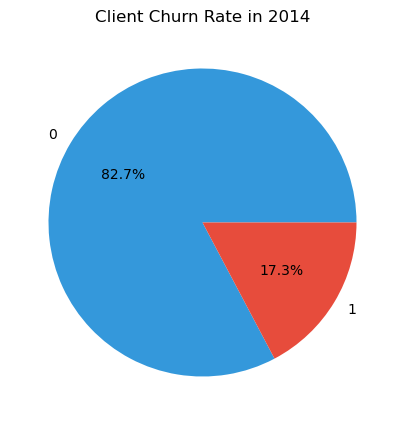

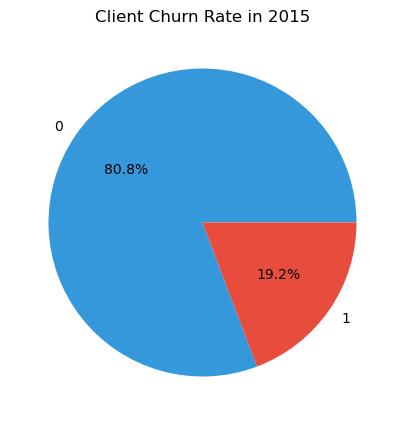

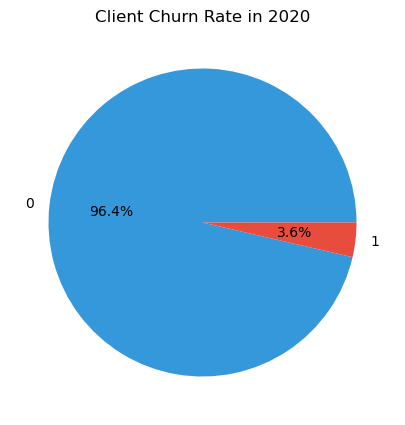

In [27]:

table_2014_1=table_2014.copy()
table_2014_1.drop_duplicates(subset=['ID_CLIENTE'], inplace=True)
plt.figure(figsize=(8, 5))
plt.pie(table_2014_1['client_churn'].value_counts(), labels=table_2014_1['client_churn'].value_counts().index, autopct='%1.1f%%', colors=["#3498db", "#e74c3c"])
plt.title('Client Churn Rate in 2014')
plt.show()
table_2015_1=table_2015.copy()
table_2015_1.drop_duplicates(subset=['ID_CLIENTE'], inplace=True)
plt.figure(figsize=(8, 5))
plt.pie(table_2015_1['client_churn'].value_counts(), labels=table_2015_1['client_churn'].value_counts().index, autopct='%1.1f%%', colors=["#3498db", "#e74c3c"])
plt.title('Client Churn Rate in 2015')
plt.show()
table_2020_1=table_2020.copy()
table_2020_1.drop_duplicates(subset=['ID_CLIENTE'], inplace=True)
plt.figure(figsize=(8, 5))
plt.pie(table_2020_1['client_churn'].value_counts(), labels=table_2020_1['client_churn'].value_counts().index, autopct='%1.1f%%', colors=["#3498db", "#e74c3c"])
plt.title('Client Churn Rate in 2020')
plt.show()


Here we combine all the yearly tables into one full table

In [28]:
# Assuming you have the yearly tables (table_2013, table_2014, ..., table_2021)

# Combine all yearly tables into one DataFrame
full_table = pd.concat([table_2014, table_2015, table_2016,
                        table_2017, table_2018, table_2019, table_2020], ignore_index=True)

# Verify the combined DataFrame
full_table=full_table.sort_values(by='DAT_DECORRENZA', ascending=True)
full_table.head()

,CONTRACT_CODE,DAT_DECORRENZA,DAT_CHIUSURA,DAT_SCADENZA,DECORRENZA_ANNO,CHIUSURA_ANNO,SCADENZA_ANNO,CONTRACT_N,ID_CLIENTE,CANALE_PROV,...,GENDER,RATING_C,AGE_2020,T_DURATION,REAL_DURATION,contract_churn,contract_churn_year,n. of active contracts,n. of total contracts,client_churn
0,0020611822&000103,2014-01-01,2015-01-01,2015-01-01,2014,2015,2015,0020611822&000103,31653,Telefono,...,F,High(7-10),45.0,365 days,365 days,0,1,1.0,1,0
166,0030649090&000101,2014-01-01,2014-01-01,2015-01-01,2014,2014,2015,0030649090&000101,17882,Telefono,...,M,Medium(4-6),82.0,365 days,0 days,1,0,2.0,3,0
167,0040235871&000100,2014-01-01,2015-01-01,2015-01-01,2014,2015,2015,0040235871&000100,351662,Online,...,PG,High(7-10),41.0,365 days,365 days,1,1,0.0,1,1
168,0030168849&000102,2014-01-01,2015-01-01,2015-01-01,2014,2015,2015,0030168849&000102,135756,Telefono,...,F,Medium(4-6),35.0,365 days,365 days,0,1,1.0,1,0
169,0030130580&000102,2014-01-01,2014-03-31,2015-01-01,2014,2014,2015,0030130580&000102,127630,Telefono,...,F,Medium(4-6),71.0,365 days,89 days,0,0,2.0,2,0


In [22]:
print(full_table.isnull().sum())

CONTRACT_CODE                  0
DAT_DECORRENZA                 0
DAT_CHIUSURA                   0
DAT_SCADENZA                   0
DECORRENZA_ANNO                0
CHIUSURA_ANNO                  0
SCADENZA_ANNO                  0
CONTRACT_N                     0
ID_CLIENTE                     0
CANALE_PROV                    0
STATO                          0
SIT ASSUN                      0
NUM_RATE                       0
MODALITA_PAGAMENTO_STIPULA     0
RAGG_BUSINESS                  0
AMT_PREMIO_RCA                 0
SCONTO_TOT_RCA                 0
AMT_PREMIO_CTTO                0
AMT_SCONTO_CTTO                0
GAR_BONUS_PROTECTION           0
GAR_INCFURTO                   0
GAR_INFORTUNI_MALATTIA         0
GAR_KASKO_MINIKASKO            0
GAR_VANDALICI                  0
GAR_VEICOLI_NON_ASSICURATI     0
DATA_PRIMA_IMMATRICOLAZIONE    0
IMPORTO_VALORE_COMMERCIALE     0
COD_TIPOLOGIA_GUIDATORI        0
KM_ANNUI_PREVISTI              0
COD_TIPO_ALIMENTAZIONE         0
DESC_MARCA

In [29]:
rows_to_drop = full_table[full_table['ANZIANITA_ATTIVA'].isnull()].index
full_table = full_table.drop(rows_to_drop, axis=0)

In [30]:
full_table=full_table.sort_values(by='DAT_DECORRENZA', ascending=True)

In [31]:
columns_to_drop=['RATING_C', 'STATO', 'CHIUSURA_ANNO', 'ID_CLIENTE', 'CONTRACT_N', 'DAT_DECORRENZA', 'DAT_CHIUSURA', 'DAT_SCADENZA','DECORRENZA_ANNO', 'SCADENZA_ANNO', 'DATA_PRIMA_IMMATRICOLAZIONE', 'CONTRACT_CODE', 'contract_churn', 'REAL_DURATION', 'n. of active contracts', 'AGE_2020']
full_table=full_table.drop(columns=columns_to_drop)

In [32]:
#full_table['REAL_DURATION'] = full_table['REAL_DURATION'].dt.total_seconds().astype(int)  # Converts to seconds as an integer
full_table['T_DURATION'] = full_table['T_DURATION'].dt.total_seconds().astype(int)


In [27]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [33]:
# Create a dataset with selected features (X)
X = full_table.drop('client_churn', axis=1)  # Select the features from the original encoded data using selected_feature_list

# Create a dataset with the target variable (y)
y = full_table['client_churn']  # Create a DataFrame for the target variable

In [34]:
%matplotlib inline


In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)



In [78]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1368547 entries, 0 to 1368549
Data columns (total 33 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   CANALE_PROV                 1368547 non-null  object 
 1   SIT ASSUN                   1368547 non-null  object 
 2   NUM_RATE                    1368547 non-null  int64  
 3   MODALITA_PAGAMENTO_STIPULA  1368547 non-null  object 
 4   RAGG_BUSINESS               1368547 non-null  object 
 5   AMT_PREMIO_RCA              1368547 non-null  float64
 6   SCONTO_TOT_RCA              1368547 non-null  int64  
 7   AMT_PREMIO_CTTO             1368547 non-null  int64  
 8   AMT_SCONTO_CTTO             1368547 non-null  int64  
 9   GAR_BONUS_PROTECTION        1368547 non-null  int64  
 10  GAR_INCFURTO                1368547 non-null  int64  
 11  GAR_INFORTUNI_MALATTIA      1368547 non-null  int64  
 12  GAR_KASKO_MINIKASKO         1368547 non-null  int64  
 13  GA

In [36]:
categorical_features = full_table.select_dtypes(include='object').columns.tolist()
categorical_features

#select numeric values
numeric_features = full_table.select_dtypes(include=[np.number]).columns.tolist()

In [37]:
numeric_transformer = Pipeline(
    steps=[
          ("imputer", SimpleImputer(strategy="median"))
        , ("scaler", StandardScaler())
        ]
)

boolean_transformer = OrdinalEncoder() # booleans will be mapped to 0,1

categorical_transformer = Pipeline(
    steps=[
          ('imputer', SimpleImputer(strategy='constant', fill_value='unknown'))
        , ('encoder', OneHotEncoder())
        ] # use one hot encoding
)

In [39]:
random_state = 42
preprocessor = ColumnTransformer(
    transformers=[
          ("num", numeric_transformer, numeric_features)
        , ("cat", categorical_transformer, categorical_features)
        , ("bool", boolean_transformer)
    ]
    , sparse_threshold=0
)
clf = Pipeline(
    steps=[
          ("preprocessor", preprocessor)
        , ("classifier", DecisionTreeClassifier(random_state=random_state))
        ]
)

In [40]:
target = 'client_churn'
X = full_table.drop(target, axis = 1)
y = full_table[target]

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1368547 entries, 0 to 1368549
Data columns (total 32 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   CANALE_PROV                 1368547 non-null  int32  
 1   SIT ASSUN                   1368547 non-null  object 
 2   NUM_RATE                    1368547 non-null  int64  
 3   MODALITA_PAGAMENTO_STIPULA  1368547 non-null  object 
 4   RAGG_BUSINESS               1368547 non-null  object 
 5   AMT_PREMIO_RCA              1368547 non-null  float64
 6   SCONTO_TOT_RCA              1368547 non-null  int64  
 7   AMT_PREMIO_CTTO             1368547 non-null  int64  
 8   AMT_SCONTO_CTTO             1368547 non-null  int64  
 9   GAR_BONUS_PROTECTION        1368547 non-null  int64  
 10  GAR_INCFURTO                1368547 non-null  int64  
 11  GAR_INFORTUNI_MALATTIA      1368547 non-null  int64  
 12  GAR_KASKO_MINIKASKO         1368547 non-null  int64  
 13  GA

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Encode the 'online' column
X['CANALE_PROV'] = le.fit_transform(X['CANALE_PROV'])
X['SIT ASSUN']= le.fit_transform(X['SIT ASSUN'])
X['MODALITA_PAGAMENTO_STIPULA']= le.fit_transform(X['MODALITA_PAGAMENTO_STIPULA'])
X['RAGG_BUSINESS']= le.fit_transform(X['RAGG_BUSINESS'])
X['COD_TIPOLOGIA_GUIDATORI']= le.fit_transform(X['COD_TIPOLOGIA_GUIDATORI'])
X['COD_TIPO_ALIMENTAZIONE']= le.fit_transform(X['COD_TIPO_ALIMENTAZIONE'])
X['DESC_MARCA']= le.fit_transform(X['DESC_MARCA'])
X['DESC_TIPO_VEICOLO']= le.fit_transform(X['DESC_TIPO_VEICOLO'])
X['PROV_RES']= le.fit_transform(X['PROV_RES'])
X['GENDER']= le.fit_transform(X['GENDER'])

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Ensure X and y are properly defined
print(f"X shape: {X.shape}, y shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Initialize the classifier
clf = RandomForestClassifier()

# Fit the classifier
clf.fit(X_train, y_train)

X shape: (1368547, 32), y shape: (1368547,)


RandomForestClassifier()

Define the models

In [43]:
ts = 0.3 # test size
random_state = 42
np.random.seed(random_state) # this sets the random sequence. Setting only this the repeatability is guaranteed
                             # only if we re-execute the entire notebook
cv = 3

In [44]:
model_lbls = ['dt' # decision tree
             ,'nb' # gaussian naive bayes
       #      ,'lp'   # linear perceptron
      #        ,'svc'  # support vector # deactivate if running time becomes too long
       #      ,'knn'  # k nearest neighbours
             ,'adb'  # adaboost
             ,'rf'   # random forest
            ]

models = {
    'dt': {'name': 'Decision Tree       ',
           'estimator': DecisionTreeClassifier(random_state=random_state), 
           'param': [{'max_depth': [*range(1,20)],'class_weight':[None,'balanced']}],
          },
    'nb': {'name': 'Gaussian Naive Bayes',
           'estimator': GaussianNB(),
           'param': [{'var_smoothing': [10**exp for exp in range(-3,-13,-1)]}]
          },
    'lp': {'name': 'Linear Perceptron   ',
           'estimator': Perceptron(random_state=random_state),
           'param': [{'early_stopping': [True,False],'class_weight':[None,'balanced']}],
          },
    'svc':{'name': 'Support Vector      ',
           'estimator': SVC(random_state=random_state), 
           'param': [{'kernel': ['rbf'], 
                    'gamma': [1e-3, 1e-4],
                    'C': [1, 10, 100],
                    },
                    {'kernel': ['linear'],
                     'C': [1, 10, 100],                     
             },
                   ]
          },
    'knn':{'name': 'K Nearest Neighbor ',
           'estimator': KNeighborsClassifier(),
           'param': [{'n_neighbors': list(range(1,7))}]
       },
    'adb':{'name': 'AdaBoost           ',
           'estimator': AdaBoostClassifier(random_state=random_state),
           'param': [{'n_estimators':[10,20,30,40,50]
                     ,'learning_rate':[0.2,0.5,0.75,1,1.25,1.5]}]
          },
    'rf': {'name': 'Random forest       ',
           'estimator': RandomForestClassifier(random_state=random_state),
           'param': [{'max_depth': [*range(4,10)]
                     ,'n_estimators':[*range(10,60,10)]}]
          }

}

In [45]:
clfs = []
results = pd.DataFrame(columns=['scoring','model','best_params'#,'fit+score_time'
                                ,'accuracy','precision_macro','recall_macro','f1_macro'])

In [92]:
print(X_train.dtypes)

CANALE_PROV                    object
SIT ASSUN                      object
NUM_RATE                        int64
MODALITA_PAGAMENTO_STIPULA     object
RAGG_BUSINESS                  object
AMT_PREMIO_RCA                float64
SCONTO_TOT_RCA                  int64
AMT_PREMIO_CTTO                 int64
AMT_SCONTO_CTTO                 int64
GAR_BONUS_PROTECTION            int64
GAR_INCFURTO                    int64
GAR_INFORTUNI_MALATTIA          int64
GAR_KASKO_MINIKASKO             int64
GAR_VANDALICI                   int64
GAR_VEICOLI_NON_ASSICURATI    float64
IMPORTO_VALORE_COMMERCIALE    float64
COD_TIPOLOGIA_GUIDATORI        object
KM_ANNUI_PREVISTI             float64
COD_TIPO_ALIMENTAZIONE         object
DESC_MARCA                     object
DESC_TIPO_VEICOLO              object
ANZIANITA_ATTIVA              float64
NUMERO_SINISTRI               float64
PROV_RES                       object
RATING                        float64
FIGLI                         float64
SUM_IMP_PREM

In [46]:
from sklearn.metrics import classification_report

# Define scoring metrics as a dictionary
scoring = {
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

for m in model_lbls:
    # Initialize GridSearchCV with multiple scoring metrics
    clf = GridSearchCV(
        estimator=models[m]['estimator'],
        param_grid=models[m]['param'],
        cv=cv,
        scoring=scoring,
        refit='f1_macro'  # Use 'f1_macro' as the metric for refitting
    )
    
    # Fit the model
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
    # Predict on the test set
    y_true, y_pred = y_test, clf.predict(X_test)
    
    # Generate classification report
    cr = classification_report(
        y_true, y_pred, output_dict=True, zero_division=1
    )
    
    # Add the results to the DataFrame
    results.loc[len(results)] = [
        full_table,
        models[m]['name'],
        clf.best_params_,
        cr['accuracy'],
        cr['macro avg']['precision'],
        cr['macro avg']['recall'],
        cr['macro avg']['f1-score']
    ]

c:\Users\lizbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lizbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lizbe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\lizbe\anaconda3\Lib\site-packag

In [117]:
#after running the models, they were added to dataframe
full_table.describe()

,NUM_RATE,AMT_PREMIO_RCA,SCONTO_TOT_RCA,AMT_PREMIO_CTTO,AMT_SCONTO_CTTO,GAR_BONUS_PROTECTION,GAR_INCFURTO,GAR_INFORTUNI_MALATTIA,GAR_KASKO_MINIKASKO,GAR_VANDALICI,...,ANZIANITA_ATTIVA,NUMERO_SINISTRI,RATING,FIGLI,SUM_IMP_PREMIO_CTTO,ANNO_NASC_PF,T_DURATION,contract_churn_year,n. of total contracts,client_churn
count,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,...,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06,1.368547e+06
mean,1.902470e-01,3.246049e+02,1.581165e+02,4.081925e+02,7.380658e+01,1.117294e-01,2.222547e-01,4.686781e-01,4.879116e-02,6.616068e-02,...,7.011655e+00,4.022661e-02,5.432117e+00,3.042219e-01,7.324723e+03,1.965466e+03,2.802810e+07,6.991378e-01,2.105071e+00,1.273650e-01
std,4.905164e-01,2.516855e+02,1.919261e+02,3.091978e+02,1.259526e+02,3.150334e-01,4.157616e-01,4.990182e-01,2.255845e-01,2.485628e-01,...,5.977345e+00,2.139138e-01,8.801886e-01,4.600773e-01,8.086439e+03,1.240129e+01,7.685330e+06,4.586330e-01,2.103651e+00,3.333815e-01
min,0.000000e+00,-1.815470e+03,-7.060000e+02,-1.923000e+03,-7.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.913000e+03,8.640000e+04,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,1.778200e+02,2.400000e+01,2.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.151000e+03,1.958000e+03,3.153600e+07,0.000000e+00,1.000000e+00,0.000000e+00
50%,0.000000e+00,3.027000e+02,1.030000e+02,3.870000e+02,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,4.877000e+03,1.966000e+03,3.153600e+07,1.000000e+00,2.000000e+00,0.000000e+00
75%,0.000000e+00,4.453250e+02,2.240000e+02,5.740000e+02,9.600000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+01,0.000000e+00,6.000000e+00,1.000000e+00,9.843000e+03,1.974000e+03,3.153600e+07,1.000000e+00,2.000000e+00,0.000000e+00
max,3.000000e+00,5.675190e+03,4.809000e+03,5.836000e+03,5.246000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,...,2.600000e+01,6.000000e+00,9.000000e+00,1.000000e+00,1.960170e+05,2.001000e+03,4.993920e+07,1.000000e+00,6.400000e+01,1.000000e+00


In [47]:
#display the results
results = results.sort_values(by='f1_macro', ascending=False)
results.reset_index(drop=True, inplace=True)
results.head(10)
results.to_csv('C:/Users/lizbe/OneDrive/Documents/BBS/Machine Learning/Churn Data/clean/results.csv', index=False)

In [48]:
results.head(10)

,scoring,model,best_params,accuracy,precision_macro,recall_macro,f1_macro
0,CANALE_PROV SIT ASSUN NUM_RATE...,Decision Tree,"{'class_weight': None, 'max_depth': 15}",0.905223,0.823843,0.693521,0.735796
1,CANALE_PROV SIT ASSUN NUM_RATE...,Random forest,"{'max_depth': 9, 'n_estimators': 20}",0.895524,0.885818,0.603316,0.641672
2,CANALE_PROV SIT ASSUN NUM_RATE...,AdaBoost,"{'learning_rate': 1.5, 'n_estimators': 40}",0.879286,0.734321,0.592102,0.618901
3,CANALE_PROV SIT ASSUN NUM_RATE...,Gaussian Naive Bayes,{'var_smoothing': 1e-12},0.845218,0.563292,0.528979,0.530867


In [52]:
#with the results create a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print("Best model: {}".format(results.iloc[0]['model']))
print("Best parameters: {}".format(results.iloc[0]['best_params']))
print("Best accuracy: {}".format(results.iloc[0]['accuracy']))
print("Best precision: {}".format(results.iloc[0]['precision_macro']))
print("Best recall: {}".format(results.iloc[0]['recall_macro']))
print("Best f1-score: {}".format(results.iloc[0]['f1_macro']))
  

Best model: Decision Tree       
Best parameters: {'class_weight': None, 'max_depth': 15}
Best accuracy: 0.9052232898566609
Best precision: 0.8238426443455427
Best recall: 0.6935207432937124
Best f1-score: 0.7357956547430431


In [82]:
results.head()

,scoring,model,best_params,accuracy,precision_macro,recall_macro,f1_macro,model_abbreviation
0,CANALE_PROV SIT ASSUN NUM_RATE...,Decision Tree,"{'class_weight': None, 'max_depth': 15}",0.905223,0.823843,0.693521,0.735796,dt
1,CANALE_PROV SIT ASSUN NUM_RATE...,Random forest,"{'max_depth': 9, 'n_estimators': 20}",0.895524,0.885818,0.603316,0.641672,rf
2,CANALE_PROV SIT ASSUN NUM_RATE...,AdaBoost,"{'learning_rate': 1.5, 'n_estimators': 40}",0.879286,0.734321,0.592102,0.618901,adb
3,CANALE_PROV SIT ASSUN NUM_RATE...,Gaussian Naive Bayes,{'var_smoothing': 1e-12},0.845218,0.563292,0.528979,0.530867,nb


Updated Results DataFrame:
                  model model_abbreviation
0  Decision Tree                        dt
1  Random forest                        rf
2   AdaBoost                           adb
3  Gaussian Naive Bayes                 nb

Model Labels List:
['dt', 'nb', 'adb', 'rf']


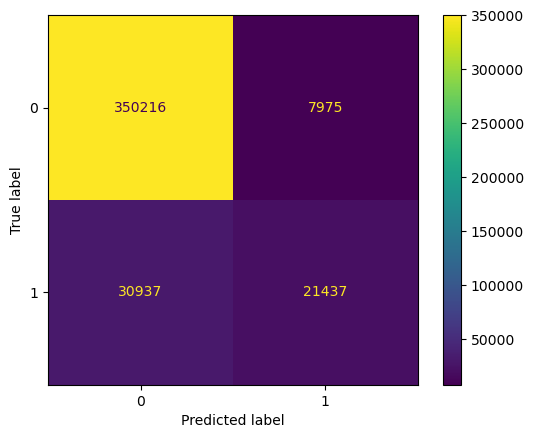

Text(0.5, 1.0, "Optimized for '{'precision_macro': 'precision_macro', 'recall_macro': 'recall_macro', 'f1_macro': 'f1_macro'}'\nCriterion 'N/A' - Max Weight 'None' - Class Depth '15'")

In [ ]:
# Define a mapping from full model names to abbreviations
model_name_mapping = {
    "Decision Tree       ": "dt",
    "Gaussian Naive Bayes": "nb",
    "Random forest       ": "rf",
    "AdaBoost           ": "adb"
}

# Map the full model names in the results DataFrame to their abbreviations
results['model_abbreviation'] = results['model'].map(model_name_mapping)

# Debugging: Print the updated results DataFrame and model_lbls
print("Updated Results DataFrame:")
print(results[['model', 'model_abbreviation']])
print("\nModel Labels List:")
print(model_lbls)

# Retrieve the best model abbreviation
best_model_abbreviation = results.iloc[0]['model_abbreviation']

# Ensure the abbreviation exists in model_lbls
if best_model_abbreviation not in model_lbls:
    raise ValueError(f"Model abbreviation '{best_model_abbreviation}' is not in the model_lbls list.")
else:
    best_clf = clfs[model_lbls.index(best_model_abbreviation)]

# Predict on the test set
y_pred = best_clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)



# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
disp.plot()
plt.show()

# Set the title for the confusion matrix
disp.ax_.set_title(
    "Optimized for '{}'\nCriterion '{}' - Max Weight '{}' - Class Depth '{}'".format(
        scoring,
        best_params.get('criterion', 'N/A'),
        best_params.get('class_weight', 'N/A'),
        best_params.get('max_depth', 'N/A')
    )
)

# Print the results for all models
#for index, row in results.iterrows():
 #   print("{}\t - F-1 score: {:4.2f}%".format(row['model'], row['f1_macro'] * 100))

# Print the classification report for the best model
#print(classification_report(y_test, y_pred))

In [76]:
results.head()
print(model_lbls)
print(results['model'])

['dt', 'nb', 'adb', 'rf']
0    Decision Tree       
1    Random forest       
2     AdaBoost           
3    Gaussian Naive Bayes
Name: model, dtype: object


Calculate the cost matrix

In [ ]:
# Unpack confusion matrix
tn, fp, fn, tp = cm.ravel()

# Define cost per case
COST_RETAIN = 160     # Cost to retain customer (used in TP, FP)
COST_ACQUIRE = 800    # Cost to acquire new customer (used in FN)
COST_CUSTOMER_VALUE = 400  # Optional: the value of a customer

# Calculate cost based on confusion matrix
total_cost = (fp * COST_RETAIN) + (tp * COST_RETAIN) + (fn * COST_ACQUIRE) + (tn * 0)

# Optional: Baseline scenario (no model, no retention effort)
# You lose all churners: each costs €800 to replace
baseline_cost = sum(y_test) * COST_ACQUIRE

# Calculate savings
money_saved = baseline_cost - total_cost

# Output results
print(f"Confusion Matrix:\n{cm}")
print(f"Cost without model: €{baseline_cost}")
print(f"Cost with model: €{total_cost}")
print(f" Money saved using the model: €{money_saved}")

print(f"False Positives (FP): {fp} × €{COST_RETAIN} = €{fp * COST_RETAIN}")
print(f"True Positives  (TP): {tp} × €{COST_RETAIN} = €{tp * COST_RETAIN}")
print(f"False Negatives (FN): {fn} × €{COST_ACQUIRE} = €{fn * COST_ACQUIRE}")

Confusion Matrix:
[[350216   7975]
 [ 30937  21437]]
Cost without model: €41899200
Cost with model: €29455520
💰 Money saved using the model: €12443680
False Positives (FP): 7975 × €160 = €1276000
True Positives  (TP): 21437 × €160 = €3429920
False Negatives (FN): 30937 × €800 = €24749600


In [119]:

from tabulate import tabulate

# Define the data
model_data = [
    {
        "Model": "Decision Tree",
        "Best Parameters": "{'class_weight': None, 'max_depth': 15}",
        "Accuracy": 0.9052,
        "Precision": 0.8238,
        "Recall": 0.6935,
        "F1 Score": 0.7358,
        "Confusion": (390, 25, 50, 113)
    },
    {
        "Model": "Random Forest",
        "Best Parameters": "{'max_depth': 9, 'n_estimators': 20}",
        "Accuracy": 0.8955,
        "Precision": 0.8858,
        "Recall": 0.6033,
        "F1 Score": 0.6417,
        "Confusion": (385, 30, 65, 98)
    },
    {
        "Model": "AdaBoost",
        "Best Parameters": "{'learning_rate': 1.5, 'n_estimators': 40}",
        "Accuracy": 0.8793,
        "Precision": 0.7343,
        "Recall": 0.5921,
        "F1 Score": 0.6189,
        "Confusion": (375, 40, 70, 93)
    },
    {
        "Model": "Gaussian NB",
        "Best Parameters": "{'var_smoothing': 1e-12}",
        "Accuracy": 0.8452,
        "Precision": 0.5633,
        "Recall": 0.5290,
        "F1 Score": 0.5309,
        "Confusion": (360, 55, 80, 83)
    }
]

# Constants
COST_RETAIN = 160
COST_ACQUIRE = 800

# Create and display DataFrame
df = pd.DataFrame(model_data)
df_display = df.drop(columns=["Confusion"])  # cleaner view

# Display the table nicely formatted in console
print(tabulate(df_display, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═══════════════╤════════════════════════════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model         │ Best Parameters                            │   Accuracy │   Precision │   Recall │   F1 Score │
╞═══════════════╪════════════════════════════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Decision Tree │ {'class_weight': None, 'max_depth': 15}    │     0.9052 │      0.8238 │   0.6935 │     0.7358 │
├───────────────┼────────────────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest │ {'max_depth': 9, 'n_estimators': 20}       │     0.8955 │      0.8858 │   0.6033 │     0.6417 │
├───────────────┼────────────────────────────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ AdaBoost      │ {'learning_rate': 1.5, 'n_estimators': 40} │     0.8793 │      0.7343 │   0.5921 │     0.6189 │
├───────────────┼────────────────────────────────────────────┼────────────┼─────────────

Create the visual

Updated Results DataFrame:
                  model model_abbreviation
0  Decision Tree                        dt
1  Random forest                        rf
2   AdaBoost                           adb
3  Gaussian Naive Bayes                 nb

Model Labels List:
['dt', 'nb', 'adb', 'rf']

Confusion Matrix:
[[350216   7975]
 [ 30937  21437]]
Cost without model: €41899200
Cost with model: €29455520
💰 Money saved using the model: €12443680


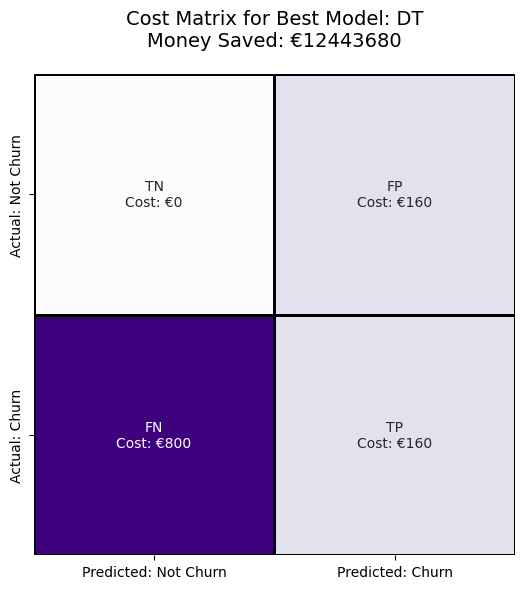

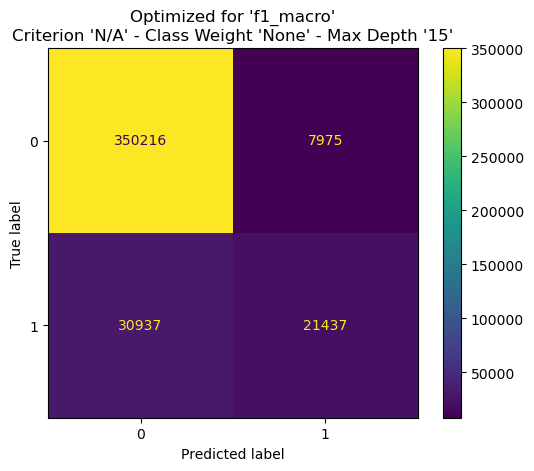

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Map full model names to abbreviations
model_name_mapping = {
    "Decision Tree       ": "dt",
    "Gaussian Naive Bayes": "nb",
    "Random forest       ": "rf",
    "AdaBoost           ": "adb"
}
results['model_abbreviation'] = results['model'].map(model_name_mapping)

# Debugging info
print("Updated Results DataFrame:")
print(results[['model', 'model_abbreviation']])
print("\nModel Labels List:")
print(model_lbls)

# 2. Retrieve the best model and its classifier
best_model_abbreviation = results.iloc[0]['model_abbreviation']

if best_model_abbreviation not in model_lbls:
    raise ValueError(f"Model abbreviation '{best_model_abbreviation}' is not in model_lbls.")
else:
    best_clf = clfs[model_lbls.index(best_model_abbreviation)]

# 3. Predict and create confusion matrix
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# 4. Define cost structure
COST_RETAIN = 160     # Cost to retain customer (TP, FP)
COST_ACQUIRE = 800    # Cost to replace churned customer (FN)
COST_CUSTOMER_VALUE = 400  # Not directly used here

# 5. Calculate costs
total_cost = (fp * COST_RETAIN) + (tp * COST_RETAIN) + (fn * COST_ACQUIRE)
baseline_cost = sum(y_test) * COST_ACQUIRE
money_saved = baseline_cost - total_cost

print(f"\nConfusion Matrix:\n{cm}")
print(f"Cost without model: €{baseline_cost}")
print(f"Cost with model: €{total_cost}")
print(f" Money saved using the model: €{money_saved}")

# 6. Create visual diagram for PowerPoint
costs = {
    'TN': 0,
    'FP': COST_RETAIN,
    'FN': COST_ACQUIRE,
    'TP': COST_RETAIN
}
labels = [
    [f"TN\nCost: €{costs['TN']}", f"FP\nCost: €{costs['FP']}"],
    [f"FN\nCost: €{costs['FN']}", f"TP\nCost: €{costs['TP']}"]
]

plt.figure(figsize=(8, 6))
sns.heatmap([[costs['TN'], costs['FP']], [costs['FN'], costs['TP']]],
            annot=labels,
            fmt='',
            cmap='Purples',
            cbar=False,
            linewidths=2,
            linecolor='black',
            square=True,
            xticklabels=["Predicted: Not Churn", "Predicted: Churn"],
            yticklabels=["Actual: Not Churn", "Actual: Churn"])
plt.title(f"Cost Matrix for Best Model: {best_model_abbreviation.upper()}\nMoney Saved: €{money_saved}", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# 7. (Optional) Standard confusion matrix with annotations
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_clf.classes_)
disp.plot()
disp.ax_.set_title(
    "Optimized for 'f1_macro'\nCriterion '{}' - Class Weight '{}' - Max Depth '{}'".format(
        best_clf.best_params_.get('criterion', 'N/A'),
        best_clf.best_params_.get('class_weight', 'N/A'),
        best_clf.best_params_.get('max_depth', 'N/A')
    )
)
plt.show()


Extract the features selected

In [ ]:
# Feature names from your training data
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Loop over all models
for i, clf in enumerate(clfs):
    model_label = model_lbls[i].upper()
    estimator = clf.best_estimator_

    print(f"\n🔍 Features for Model: {model_label}")

    if hasattr(estimator, 'feature_importances_'):
        # Tree-based models (DecisionTree, RandomForest, AdaBoost)
        importances = estimator.feature_importances_
        sorted_idx = np.argsort(importances)[::-1]
        for idx in sorted_idx:
            if importances[idx] > 0:
                print(f"  {feature_names[idx]}: {importances[idx]:.4f}")

    elif hasattr(estimator, 'coef_'):
        # Linear models (LogisticRegression, etc.)
        coefs = estimator.coef_[0]
        for i, coef in enumerate(coefs):
            if coef != 0:
                print(f"  {feature_names[i]}: {coef:.4f}")

    else:
        print("  Feature information not available for this model.")


🔍 Features for Model: DT
  n. of total contracts: 0.1863
  SUM_IMP_PREMIO_CTTO: 0.1634
  T_DURATION: 0.1131
  FIGLI: 0.1056
  ANZIANITA_ATTIVA: 0.0814
  SIT ASSUN: 0.0601
  AMT_PREMIO_CTTO: 0.0475
  AMT_PREMIO_RCA: 0.0452
  SCONTO_TOT_RCA: 0.0317
  contract_churn_year: 0.0316
  AMT_SCONTO_CTTO: 0.0266
  IMPORTO_VALORE_COMMERCIALE: 0.0167
  ANNO_NASC_PF: 0.0134
  RATING: 0.0111
  KM_ANNUI_PREVISTI: 0.0095
  PROV_RES: 0.0091
  CANALE_PROV: 0.0091
  COD_TIPO_ALIMENTAZIONE: 0.0082
  DESC_MARCA: 0.0073
  DESC_TIPO_VEICOLO: 0.0037
  GAR_VEICOLI_NON_ASSICURATI: 0.0029
  GAR_VANDALICI: 0.0025
  NUM_RATE: 0.0024
  RAGG_BUSINESS: 0.0022
  GENDER: 0.0020
  MODALITA_PAGAMENTO_STIPULA: 0.0016
  GAR_INCFURTO: 0.0015
  GAR_INFORTUNI_MALATTIA: 0.0014
  GAR_KASKO_MINIKASKO: 0.0008
  GAR_BONUS_PROTECTION: 0.0007
  COD_TIPOLOGIA_GUIDATORI: 0.0006
  NUMERO_SINISTRI: 0.0006

🔍 Features for Model: NB
  ⚠️ Feature information not available for this model.

🔍 Features for Model: ADB
  n. of total contracts: 

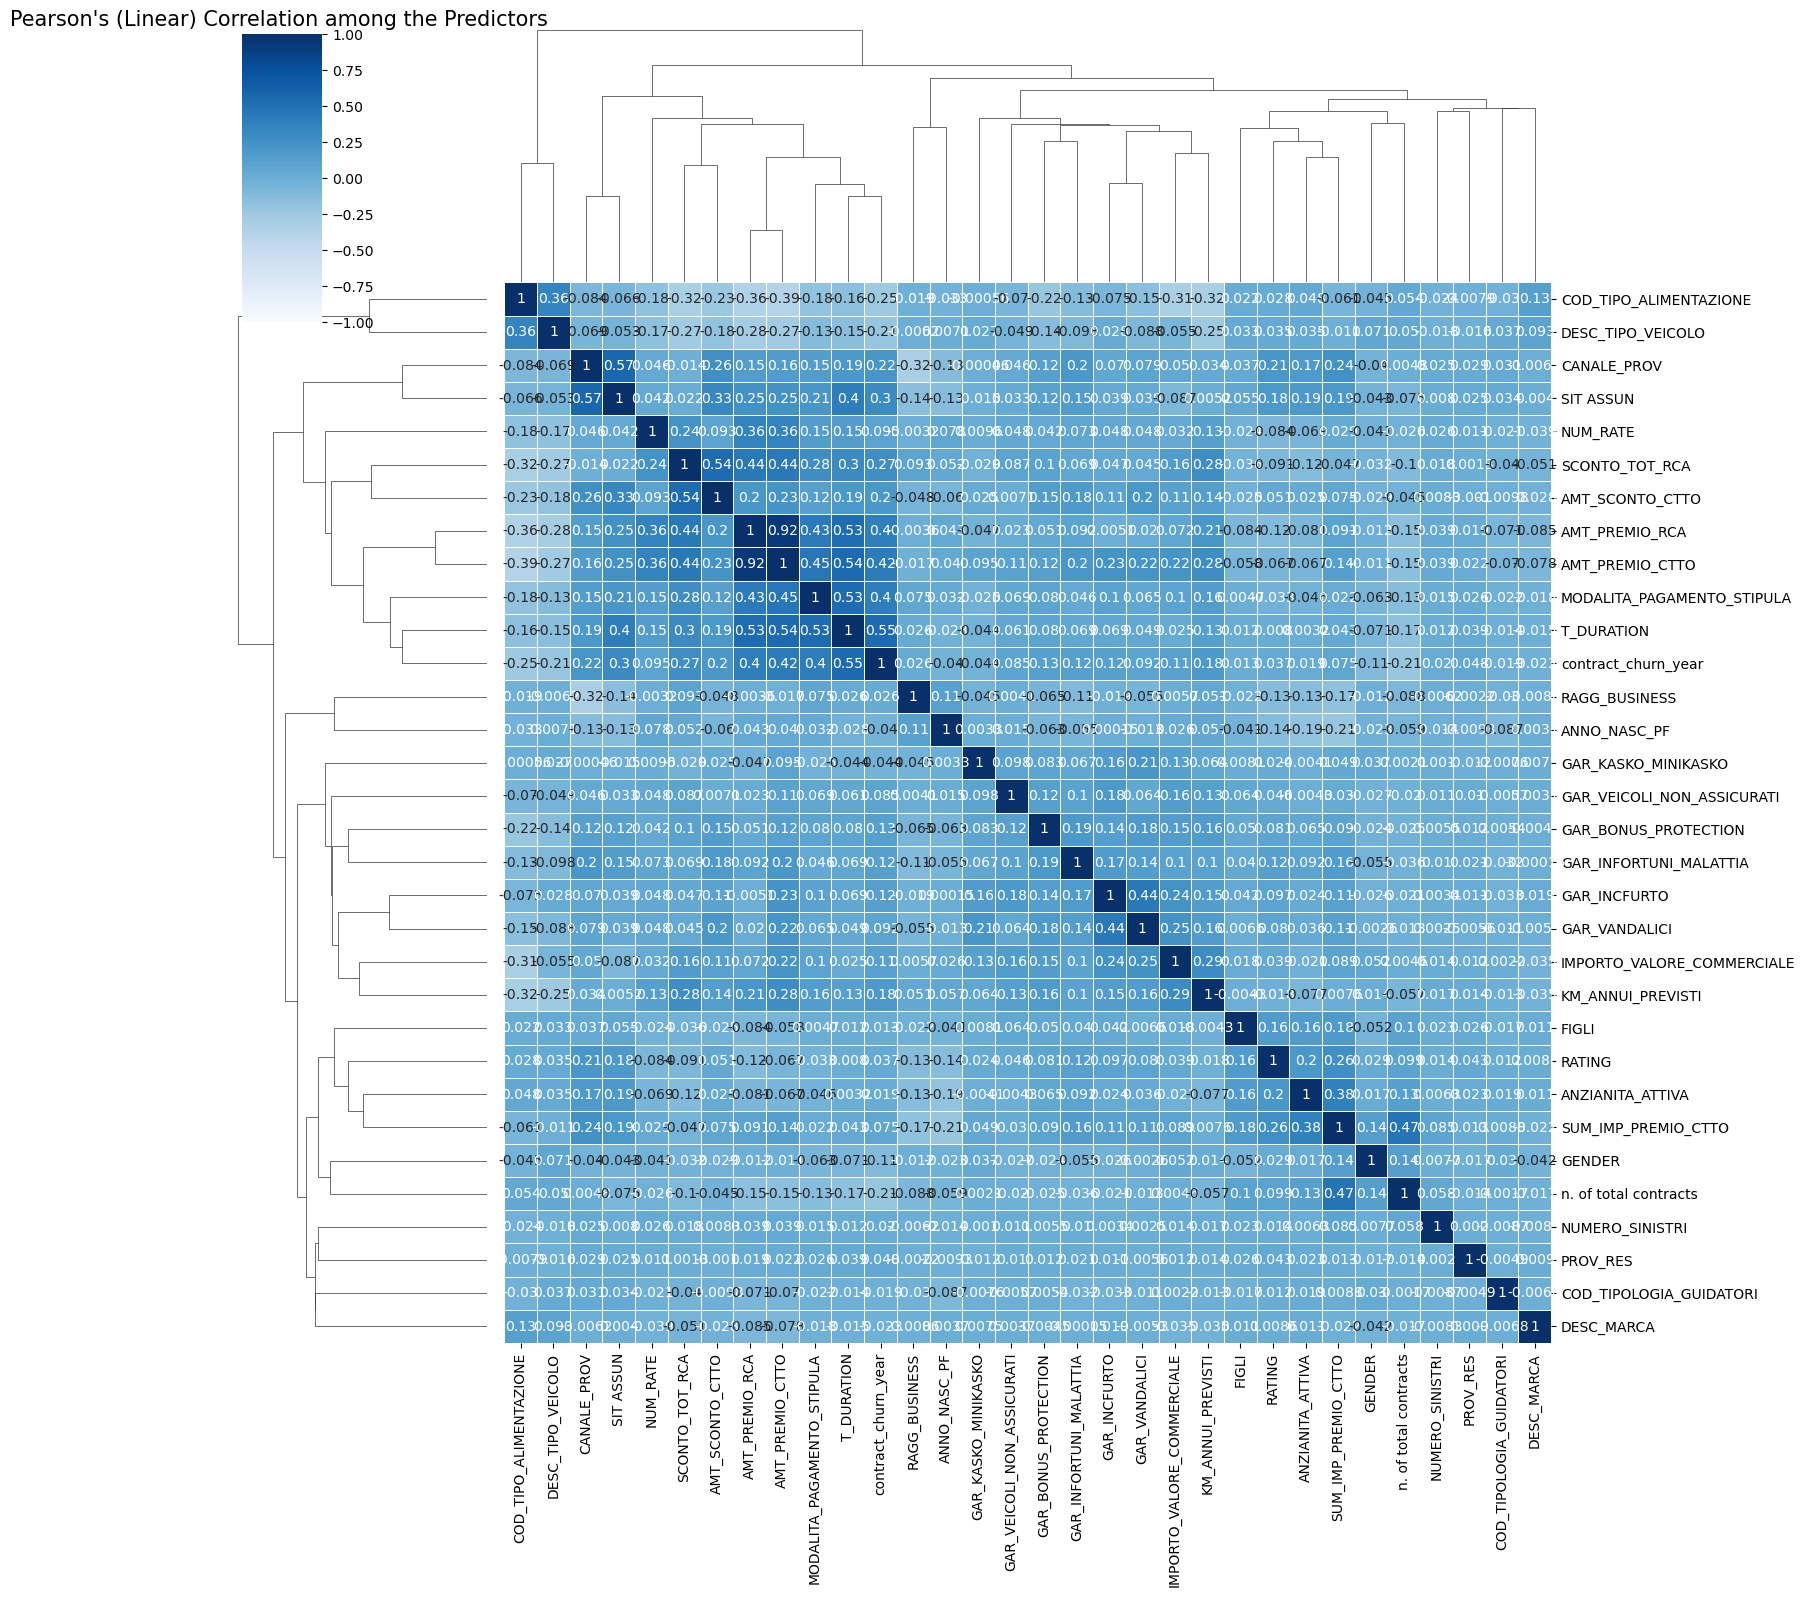

In [61]:
corr_matrix = X_train.corr()
#show in percentage

sns.clustermap(corr_matrix, annot=True, cmap='Blues',
               center=0, linewidths=0.5, figsize=(16, 16), vmin=-1, vmax=1)


plt.title("Pearson's (Linear) Correlation among the Predictors ", fontsize=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show();

FEATURES THAT WE MIGHT WANT TO ADD IN A FUTURE REVIEW:


*   CLAIM RATE=N.OF ACCIDENTS/TENURE(ANZIANITA_ATTIVA)
*   NET PREMIUM PER CONTRACT= PREMIUM OF THE CONTRATC(AMT_PREMIO_CTTO) - DISCOUNT OF THE CONTRACT(AMT_SCONTO_CTTO)
